## Quality Checking

In [1]:
import os
from PIL import Image


def read_images_from_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.JPG', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            yield image, filename

def crop_and_save_images(input_folder, output_folder, crop_box):
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for image, filename in read_images_from_folder(input_folder):
        # print(f"Processing image: {filename}")
        # Crop the image
        cropped_image = image.crop(crop_box)
        # Construct the output path
        output_path = os.path.join(output_folder, filename)
        # Save the cropped image
        cropped_image.save(output_path)
        # print(f"Saved cropped image: {output_path}")

# Construct the relative path to the input folder
current_dir = os.getcwd()
input_folder = os.path.join(current_dir, 'Data', 'badpart_full')
output_folder = os.path.join(current_dir, 'Superviseddata', 'Bad')

# Define the crop box (left, upper, right, lower)
crop_box = (950+890, 1225-45, 1010+1190, 1760+85)  # Example crop box, adjust as needed
# Crop and save images
crop_and_save_images(input_folder, output_folder, crop_box)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Quality_check\\Automated-Defect-Detection-System-for-Quality-Assurance-in-Manufacturing\\Data\\badpart_full'

## Import Liraries

In [2]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
import joblib

In [3]:
DIRECTORY = r'Superviseddata'
CATEGORIES= ['/Good' , '/Bad']
IMG_SIZE=100
data=[]
x=[]
y=[]

for category in CATEGORIES:
    folder= DIRECTORY+category
    label= CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=folder+'/'+img
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(100,100))
        data.append([img_arr, label])

random.shuffle(data)
for features, labels in data:
    x.append(features)
    y.append(labels)
x=np.array(x)
y=np.array(y)
joblib.dump(x, open('x.pkl','wb'))
joblib.dump(y, open('y.pkl','wb'))

[0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0]


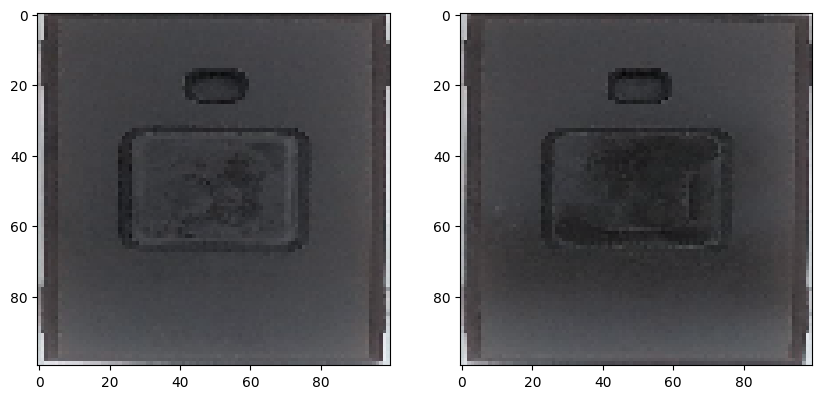

In [4]:
print(y)
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
ax[0].imshow(x[0])
ax[1].imshow(x[2])
# 0 is good and 1 is bad

In [5]:
import pickle
import time
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential

In [6]:
#scale data
x = x/255

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
#train and evaluate using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_knn=knn.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[3 1]
 [1 3]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



In [9]:
#train and evaluate using random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_rf=rf.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


[[2 2]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [10]:
#train and evaluate using SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_svm=svm.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))


[[0 4]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



C:\Users\parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [11]:
NAME=f'defect-vs-nodefect-prediction-{int(time.time())}'
tensorboard=TensorBoard(log_dir=f'logs\\{NAME}\\')

In [12]:
#train deep learning model
#Deep Learning
model= Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=x.shape[1:]))

model.add(MaxPooling2D((2,2)))
          
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='sigmoid')) #1 softmax
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(x_train,y_train, epochs=37, batch_size=5, callbacks=[tensorboard])
model.evaluate(x_test,y_test)

C:\Users\parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.5992 - loss: 1.1861
Epoch 2/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.5556 - loss: 0.6833
Epoch 3/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.4951 - loss: 0.7024
Epoch 4/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.6499 - loss: 0.6614
Epoch 5/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.6018 - loss: 0.6724
Epoch 6/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.5913 - loss: 0.6762
Epoch 7/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.5689 - loss: 0.6849
Epoch 8/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.5937 - loss: 0.6777
Epoch 9/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.6042 - loss: 0.6717
Epoch 10/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.6737 - loss: 0.6352
Epoch 11/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.5794 - loss: 0.6726
Epoch 12/37
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.6351 - l

[0.5610501766204834, 0.625]

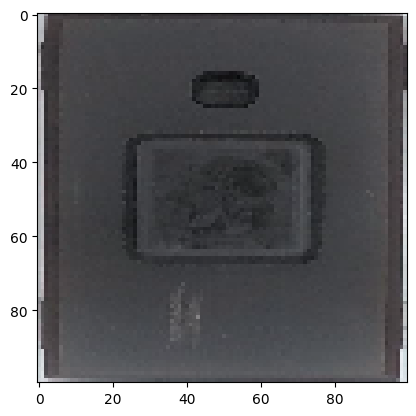

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
[[0.7038894]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


C:\Users\parth\AppData\Local\Temp\ipykernel_2984\3270713058.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_DL.append(int(y_pred_DL))


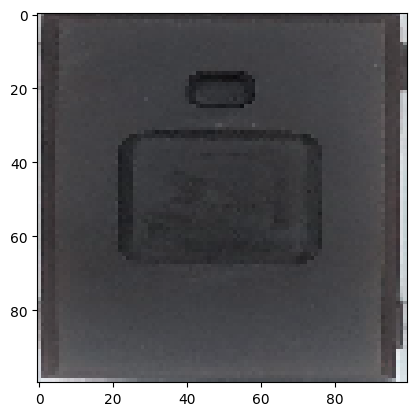

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
[[0.4888498]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


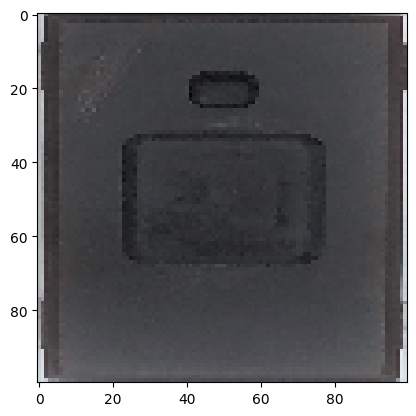

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[[0.54862356]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


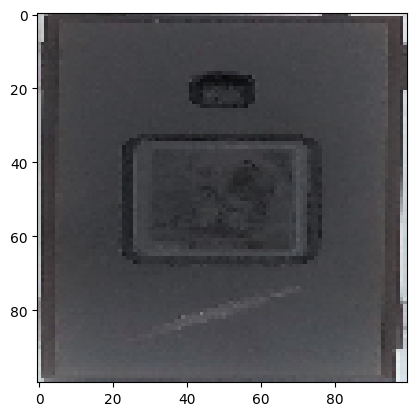

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
[[0.8392116]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


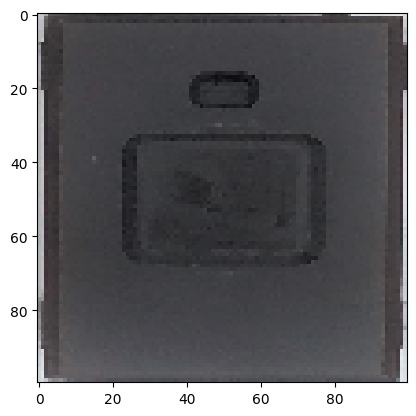

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[0.6684621]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: not defective


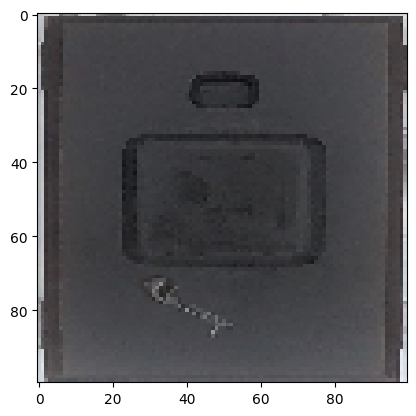

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[0.99600446]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


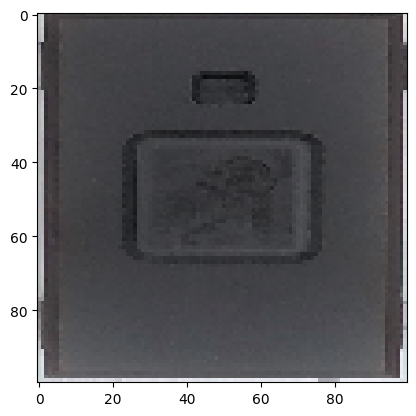

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[0.54601896]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: not defective


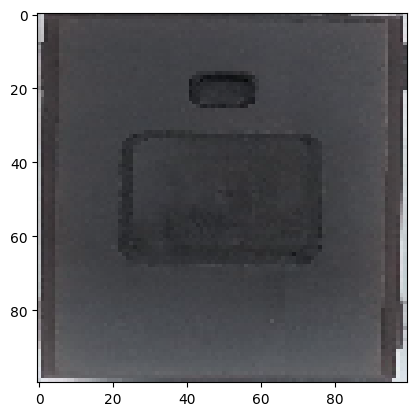

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
[[0.5474351]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: not defective
[[1 3]
 [0 4]]


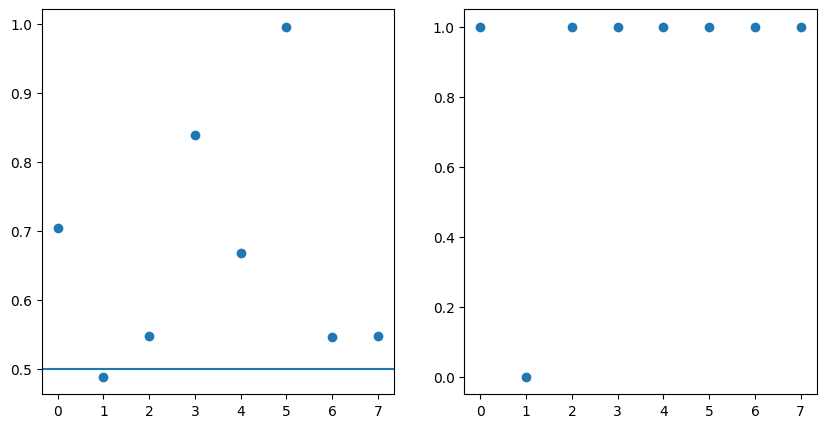

In [13]:

#make predictions
i=0
data_DL=[]
data_DL_O =[]
while i<len(y_test):
    plt.imshow(x_test[i])
    plt.show()

    y_pred_DL_O=model.predict(x_test[i,:].reshape(1, 100, 100, 3))
    print(y_pred_DL_O)
    y_pred_DL=y_pred_DL_O>0.5


    if(y_pred_DL==False):
        pred='not_defective'
    else:
        pred='defective'
    print(f"The prediction was: {pred}")
    print(f"The actual label was: {y_pred_DL}")
    if(y_test[i]==0): #good == 0  
        print(f"The actual label is: not defective")
    else: #bad == 1 
        print(f"The actual label is: defective")

    data_DL.append(int(y_pred_DL))
    data_DL_O.append(y_pred_DL_O)
    
    i=i+1
y_DL=[]
for n in range(len(y_test)):
    y_DL.append(n)

#plotting    
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
ax[1].scatter(y_DL,data_DL)
# ax[1].axhline(y=0.02)

ax[0].scatter(y_DL,data_DL_O)
ax[0].axhline(y=0.5)

##

#confusion matrix
cm = confusion_matrix(y_test, (data_DL))
print(cm)

In [14]:
#evaluate all models by using confusion matrix
def model_evaluation(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    TN = cm[0][0]
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    Negative_Predictive_Value = TN / (TN + FN)
    
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"Negative Predictive Value: {Negative_Predictive_Value}")

In [15]:
# Evaluate KNN
model_evaluation(y_test, y_pred_knn)

Accuracy: 0.75
Sensitivity: 0.75
Specificity: 0.75
Precision: 0.75
Negative Predictive Value: 0.75


In [16]:
#evaluate random forest
model_evaluation(y_test, y_pred_rf)

Accuracy: 0.75
Sensitivity: 1.0
Specificity: 0.5
Precision: 0.6666666666666666
Negative Predictive Value: 1.0


In [17]:
#evualate SVM
model_evaluation(y_test, y_pred_svm)

Accuracy: 0.5
Sensitivity: 1.0
Specificity: 0.0
Precision: 0.5
Negative Predictive Value: nan


C:\Users\parth\AppData\Local\Temp\ipykernel_2984\3205686180.py:12: RuntimeWarning: invalid value encountered in scalar divide
  Negative_Predictive_Value = TN / (TN + FN)


In [18]:
#evaluate deep learning
model_evaluation(y_test, data_DL)

Accuracy: 0.625
Sensitivity: 1.0
Specificity: 0.25
Precision: 0.5714285714285714
Negative Predictive Value: 1.0


## data augmentation

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    # rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,               ## flip is not good for this dataset. Zoom is good
    # shear_range=0.1,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # vertical_flip=True,
    # brightness_range=[0.4,1.9],
    # featurewise_center=True,    # Set input mean to 0
    featurewise_std_normalization=True,  #
    preprocessing_function=lambda x: x + np.random.normal(0, 0.09, x.shape),
    # channel_shift_range=50.0,
    fill_mode='nearest'
)



DIRECTORY = r'Superviseddata'
CATEGORIES= ['/Good' , '/Bad']
IMG_SIZE=100
data=[]
x=[]
y=[]
img_arr=[]
augmented_images=[]
folder=''
label=0

for category in CATEGORIES:
    folder= DIRECTORY+category
    label= CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=folder+'/'+img
        img_arr=cv2.imread(img_path)
        augmented_images = [datagen.random_transform(img_arr) for _ in range(3)]
        for aug_img in augmented_images:
            aug_img_resized = cv2.resize(aug_img, (IMG_SIZE, IMG_SIZE))
            data.append([aug_img_resized, label])


random.shuffle(data)
for features, labels in data:
    x.append(features)
    y.append(labels)
x=np.array(x)
y=np.array(y)
joblib.dump(x, open('x.pkl','wb'))
joblib.dump(y, open('y.pkl','wb'))

C:\Users\parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1063: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [20]:
print(y)


[1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0]


In [21]:
x = x/255.0

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
#train and evaluate using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_knn_A=knn.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_knn_A))
print(classification_report(y_test,y_pred_knn_A))

[[ 7  4]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.75      1.00      0.86        12

    accuracy                           0.83        23
   macro avg       0.88      0.82      0.82        23
weighted avg       0.87      0.83      0.82        23



In [24]:
#train and evaluate using random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_rf_A=rf.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_rf_A))
print(classification_report(y_test,y_pred_rf_A))

[[11  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [25]:
#train and evaluate using SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train.reshape(len(x_train),-1),y_train)
y_pred_svm_A=svm.predict(x_test.reshape(len(x_test),-1))
print(confusion_matrix(y_test,y_pred_svm_A))
print(classification_report(y_test,y_pred_svm_A))

[[ 2  9]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.55      0.92      0.69        12

    accuracy                           0.57        23
   macro avg       0.61      0.55      0.49        23
weighted avg       0.61      0.57      0.50        23



In [26]:
NAME=f'defect-vs-nodefect-prediction-{int(time.time())}'
tensorboard=TensorBoard(log_dir=f'logs\\{NAME}\\')

In [27]:
#train deep learning model
#Deep Learning
model_augmented= Sequential()
model_augmented.add(Conv2D(64,(3,3), activation='relu', input_shape=x.shape[1:]))
model_augmented.add(MaxPooling2D((2,2)))
          
model_augmented.add(Conv2D(64,(3,3), activation='relu'))
model_augmented.add(MaxPooling2D((2,2)))

model_augmented.add(Flatten())
model_augmented.add(Dense(128, activation='relu'))
model_augmented.add(Dense(1,activation='sigmoid')) #1 softmax
model_augmented.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_augmented.summary()

C:\Users\parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 98, 98, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 47, 47, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,372,545 (16.68 MB)

 Trainable params: 4,372,545 (16.68 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_augmented.fit(x_train,y_train, epochs=37, batch_size=5, callbacks=[tensorboard])
model_augmented.evaluate(x_test,y_test)

Epoch 1/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.5516 - loss: 1.1619
Epoch 2/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5102 - loss: 0.6963
Epoch 3/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5839 - loss: 0.6931
Epoch 4/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.6037 - loss: 0.6859
Epoch 5/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.5644 - loss: 0.6828
Epoch 6/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5812 - loss: 0.6735
Epoch 7/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.5696 - loss: 0.6691
Epoch 8/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6231 - loss: 0.6409
Epoch 9/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.6770 - loss: 0.6293
Epoch 10/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5430 - loss: 0.6497
Epoch 11/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6263 - loss: 0.6261
Epoch 12/37
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step -

[0.013470369391143322, 1.0]

# make predictions

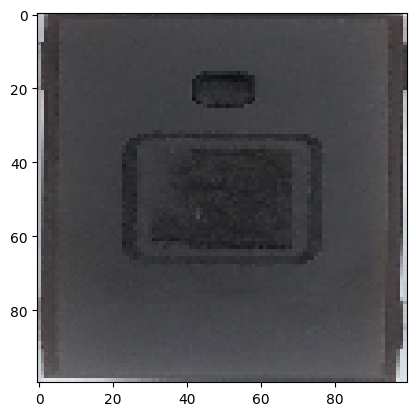

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
[[0.06010345]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


C:\Users\parth\AppData\Local\Temp\ipykernel_2984\929000271.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data_DL_A.append(int(y_pred_DL))


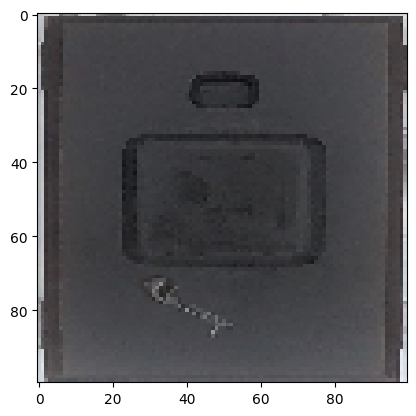

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[1.]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


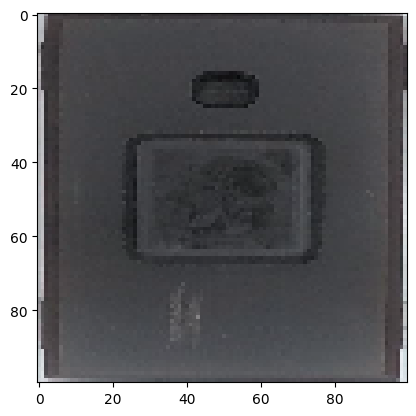

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.9970841]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


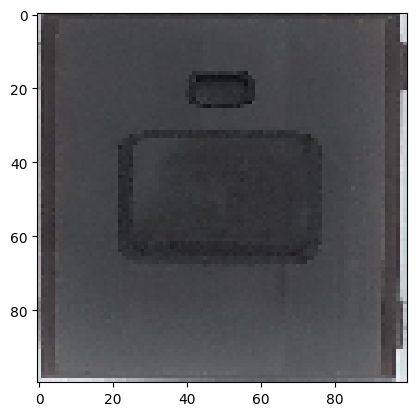

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.00748498]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


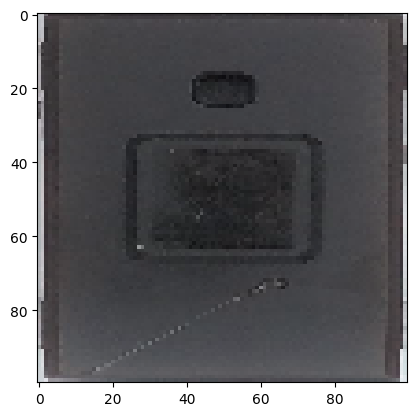

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[[0.99405444]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


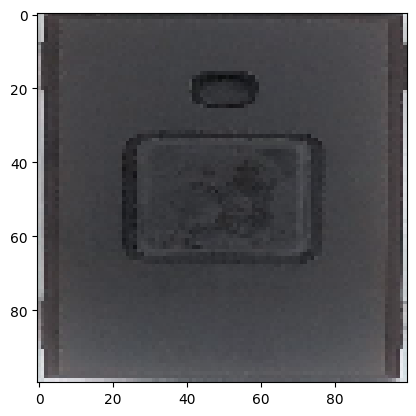

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
[[0.02312497]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


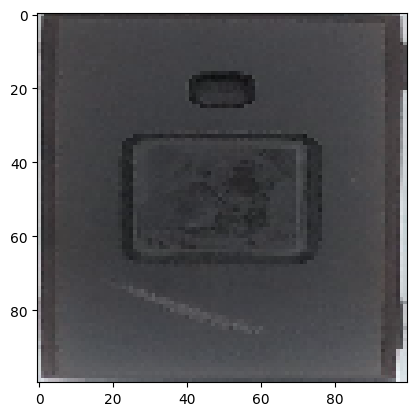

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[0.98395306]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


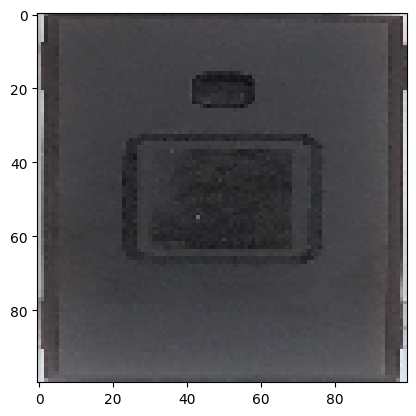

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
[[0.9126524]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


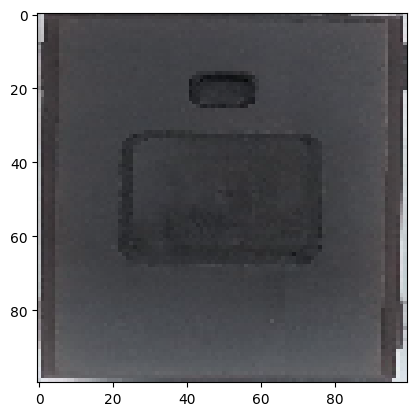

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
[[0.00231877]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


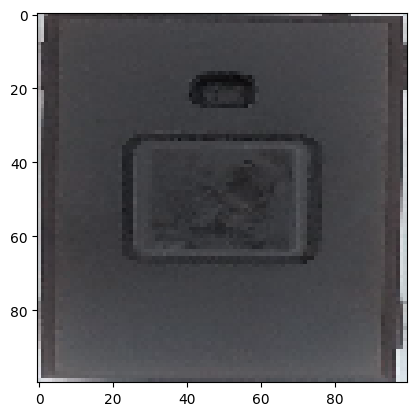

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
[[0.00715934]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


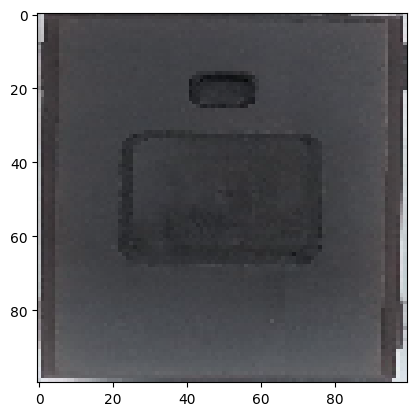

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
[[0.00231877]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


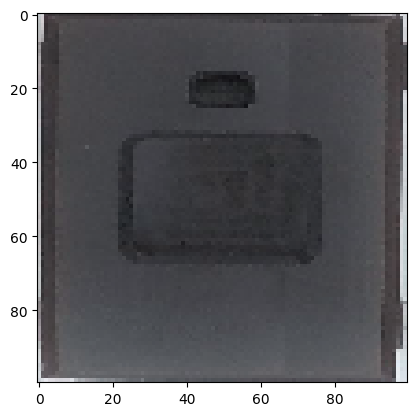

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
[[0.00838843]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


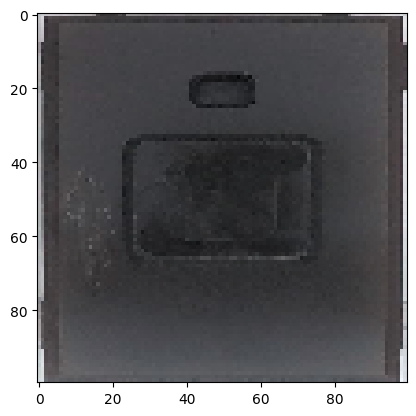

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
[[0.99348855]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


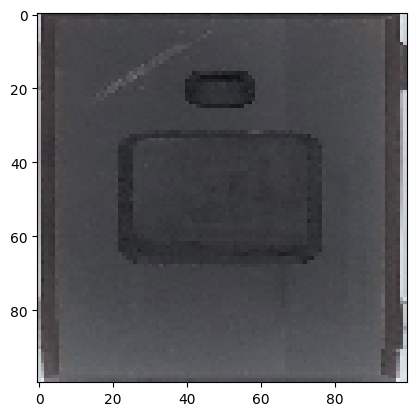

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
[[0.98234147]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


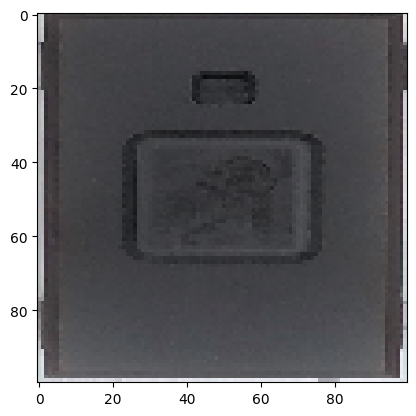

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
[[0.00777248]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


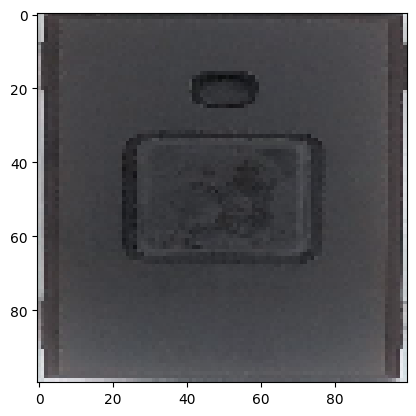

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[[0.02312497]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


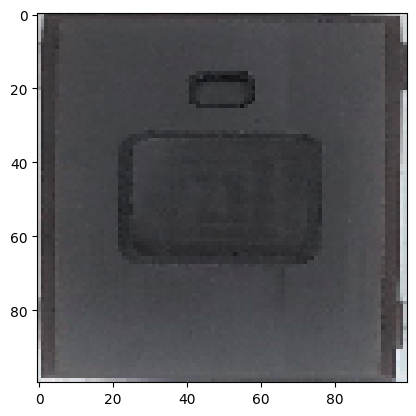

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
[[0.0026212]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective


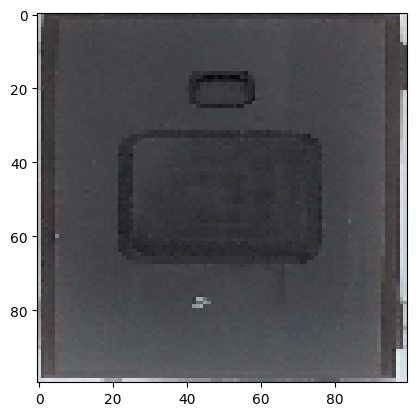

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
[[0.99984795]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


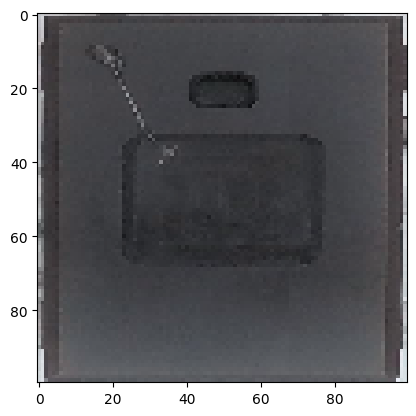

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
[[0.9999988]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


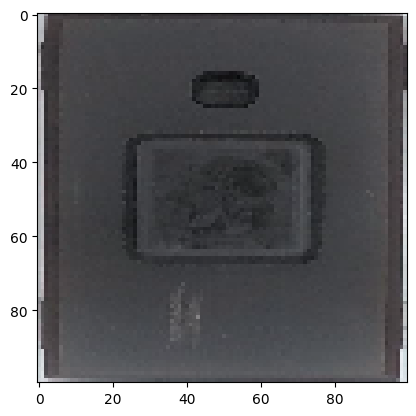

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
[[0.9970841]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


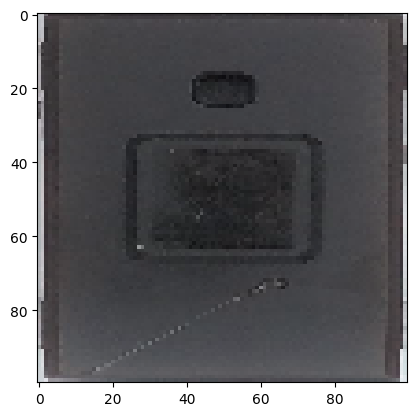

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
[[0.99405444]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


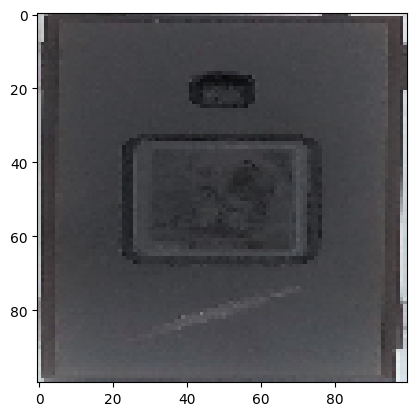

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[0.9954334]]
The prediction was: defective
The actual label was: [[ True]]
The actual label is: defective


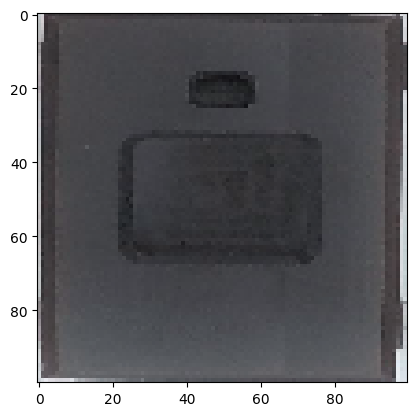

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
[[0.00838843]]
The prediction was: not_defective
The actual label was: [[False]]
The actual label is: not defective
[[11  0]
 [ 0 12]]


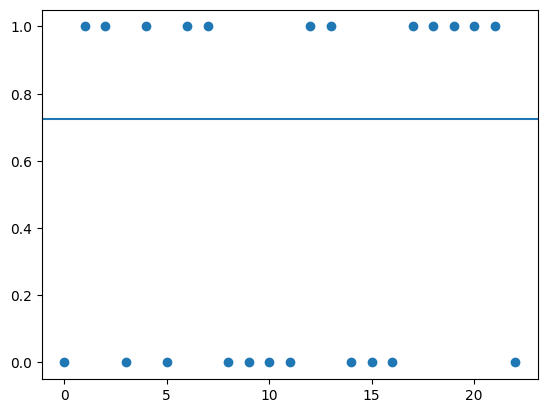

In [29]:

i=0
data_DL_A=[]
while i<len(y_test):
    plt.imshow(x_test[i])
    plt.show()

    y_pred_DL=model_augmented.predict(x_test[i,:].reshape(1, 100, 100, 3))
    print(y_pred_DL)
    y_pred_DL=y_pred_DL>0.725

    y_pred_DL= (y_pred_DL)

    if(y_pred_DL== False):
        pred='not_defective'
    else:
        pred='defective'
    print(f"The prediction was: {pred}")
    print(f"The actual label was: {y_pred_DL}")
    if(y_test[i]==0): #good == 0  
        print(f"The actual label is: not defective")
    else: #bad == 1 
        print(f"The actual label is: defective")
    data_DL_A.append(int(y_pred_DL))
    
    i=i+1
y_DL_A=[]
for n in range(len(y_test)):
    y_DL_A.append(n)
plt.scatter(y_DL_A,data_DL_A)
plt.axhline(y=0.725)

plt.show


#confusion matrix
cm = confusion_matrix(y_test, (data_DL_A))
print(cm)

In [31]:
model_augmented.save("model_augmented.h5")
